<a href="https://colab.research.google.com/github/MinseoYoo/Animal-Sentiment-Detection/blob/main/catface_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/ultralytics.git
!pip install -U pycocotools
!pip install -qr examples/YOLOv8-Action-Recognition/requirements.txt
!cp examples/YOLOv8-Action-Recognition/requirements.txt ./
!pip install ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 36522, done.
remote: Counting objects: 100% (496/496), done.
remote: Compressing objects: 100% (351/351), done.
remote: Total 36522 (delta 316), reused 288 (delta 145), pack-reused 36026 (from 1)
Receiving objects: 100% (36522/36522), 29.43 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (26685/26685), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'examples/YOLOv8-Action-Recognition/requirements.txt'
cp: cannot stat 'examples/YOLOv8-Action-Recognition/requirements.txt': No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-

In [3]:
import pandas as pd
import os
import shutil as sh
import yaml
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np
from ultralytics import YOLO
import torch
import torchvision
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from PIL import Image

In [4]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 230MB/s]


In [5]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [6]:
model.train(data='/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/data.yaml', epochs=50, imgsz=640)

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

100%|██████████| 755k/755k [00:00<00:00, 96.2MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 79.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/train/labels.cache... 1380 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1380/1380 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/wholecat_bbox/valid/labels.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.14G      1.469      3.553      1.837          8        640: 100%|██████████| 87/87 [01:39<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:41<00:00,  5.19s/it]

                   all        249        254     0.0854      0.296     0.0847     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.13G      1.482      2.815       1.81          7        640: 100%|██████████| 87/87 [01:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        249        254      0.225      0.367      0.133      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.12G      1.546      2.855      1.862         11        640: 100%|██████████| 87/87 [01:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        249        254     0.0756      0.168     0.0398     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.02G      1.543      2.825      1.841          7        640: 100%|██████████| 87/87 [01:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        249        254      0.221      0.347     0.0634     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       7.1G      1.489      2.747      1.799         12        640: 100%|██████████| 87/87 [01:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        249        254      0.166      0.533      0.193     0.0956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       7.1G      1.486      2.682      1.795          9        640: 100%|██████████| 87/87 [01:12<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        249        254      0.229      0.382      0.137     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.14G      1.428      2.546      1.721          9        640: 100%|██████████| 87/87 [01:07<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]

                   all        249        254      0.162      0.623      0.199     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.03G        1.4      2.522      1.704         13        640: 100%|██████████| 87/87 [01:07<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        249        254      0.184      0.522      0.213      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.09G      1.379      2.473       1.69         11        640: 100%|██████████| 87/87 [01:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]

                   all        249        254      0.258      0.644      0.209      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.09G      1.362      2.452      1.663         10        640: 100%|██████████| 87/87 [01:07<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        249        254      0.256      0.654      0.218      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.13G      1.321      2.385      1.649          8        640: 100%|██████████| 87/87 [01:07<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        249        254      0.189      0.559      0.226      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.03G      1.324      2.348      1.635         13        640: 100%|██████████| 87/87 [01:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        249        254      0.194      0.659      0.243      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.11G      1.299      2.316      1.626         10        640: 100%|██████████| 87/87 [01:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        249        254      0.227      0.482      0.211      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.08G      1.278      2.253      1.608         12        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        249        254      0.165      0.675      0.211      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.14G      1.272      2.235      1.586         13        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        249        254       0.19      0.733      0.241      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.03G       1.23      2.183      1.565         11        640: 100%|██████████| 87/87 [01:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        249        254      0.177      0.655      0.231       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       7.1G      1.236      2.157      1.553          8        640: 100%|██████████| 87/87 [01:04<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

                   all        249        254      0.216       0.66      0.265      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       7.1G       1.21      2.125      1.538          8        640: 100%|██████████| 87/87 [01:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        249        254      0.214      0.647       0.26      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.13G      1.199      2.099      1.543          8        640: 100%|██████████| 87/87 [01:04<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        249        254      0.163      0.644      0.232       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.03G      1.203      2.097      1.544         10        640: 100%|██████████| 87/87 [01:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        249        254      0.201      0.513      0.217      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.12G      1.157      2.035      1.499          8        640: 100%|██████████| 87/87 [01:06<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

                   all        249        254      0.231      0.715      0.319      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       7.1G      1.166      2.039      1.521          9        640: 100%|██████████| 87/87 [01:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

                   all        249        254      0.216      0.669      0.264      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.12G      1.143      1.959      1.486          8        640: 100%|██████████| 87/87 [01:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        249        254      0.247      0.606      0.263      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.03G      1.117       1.97      1.481         12        640: 100%|██████████| 87/87 [01:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        249        254      0.214      0.562      0.247      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.13G      1.108      1.927      1.459         14        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        249        254       0.24      0.622      0.329      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.11G      1.096      1.894       1.45         15        640: 100%|██████████| 87/87 [01:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        249        254      0.247       0.62      0.249       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.13G      1.081      1.879      1.449         13        640: 100%|██████████| 87/87 [01:04<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        249        254      0.271      0.604      0.348      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.02G      1.046      1.831      1.422          9        640: 100%|██████████| 87/87 [01:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        249        254      0.269      0.499      0.303      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.12G      1.079      1.852      1.444          6        640: 100%|██████████| 87/87 [01:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        249        254      0.235      0.585      0.281      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       7.1G      1.043      1.797      1.412          7        640: 100%|██████████| 87/87 [01:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        249        254       0.27      0.597      0.311      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.14G      1.018      1.726      1.397         12        640: 100%|██████████| 87/87 [01:04<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        249        254      0.269      0.498      0.304      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.03G      1.012      1.732      1.393         15        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        249        254       0.25      0.586      0.342      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.12G      1.013      1.722      1.388         12        640: 100%|██████████| 87/87 [01:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        249        254      0.251      0.617      0.314      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       7.1G      1.006      1.708      1.387          8        640: 100%|██████████| 87/87 [01:06<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        249        254      0.259        0.6      0.259      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.13G     0.9995      1.689      1.389         10        640: 100%|██████████| 87/87 [01:07<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        249        254      0.278      0.575      0.336      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.02G     0.9535      1.633      1.354         10        640: 100%|██████████| 87/87 [01:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        249        254      0.255      0.559      0.293      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.12G      0.971      1.608      1.356          9        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        249        254      0.274      0.622      0.329      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       7.1G     0.9499       1.56      1.336         11        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        249        254      0.285       0.58      0.336      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.14G     0.9224      1.528      1.325         12        640: 100%|██████████| 87/87 [01:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        249        254      0.263      0.525      0.343      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.03G     0.9398       1.55      1.333          7        640: 100%|██████████| 87/87 [01:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        249        254        0.3      0.549      0.332      0.183


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.11G     0.7836      1.084       1.32          4        640: 100%|██████████| 87/87 [01:07<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        249        254      0.284      0.603      0.333      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.11G     0.7443     0.9702      1.295          3        640: 100%|██████████| 87/87 [01:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]

                   all        249        254      0.285      0.595      0.361      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.13G     0.7283     0.8877      1.273          4        640: 100%|██████████| 87/87 [01:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        249        254       0.28      0.614      0.336      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.02G     0.6884     0.8597      1.236          4        640: 100%|██████████| 87/87 [01:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        249        254      0.332      0.518      0.313       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.11G      0.693     0.8466       1.23          4        640: 100%|██████████| 87/87 [01:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        249        254      0.282      0.584      0.338      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.07G       0.66     0.8044      1.217          4        640: 100%|██████████| 87/87 [01:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        249        254      0.308      0.556      0.358      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.11G     0.6339     0.7592      1.172          4        640: 100%|██████████| 87/87 [01:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all        249        254      0.324      0.552      0.378      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.02G     0.6188     0.7404      1.163          4        640: 100%|██████████| 87/87 [01:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        249        254      0.328       0.52      0.358        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.13G     0.6088     0.7002      1.164          4        640: 100%|██████████| 87/87 [01:04<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

                   all        249        254      0.321      0.516      0.351        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.09G     0.5792      0.674      1.148          3        640: 100%|██████████| 87/87 [01:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        249        254       0.32      0.539      0.354      0.199



50 epochs completed in 1.029 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


                   all        249        254       0.31      0.555      0.358      0.208
                 Anger         28         28      0.301       0.75      0.643       0.46
                   Beg         31         31      0.248      0.677      0.339      0.188
            Frightened          5          5     0.0789          1     0.0949      0.059
                 Happy         67         67      0.699      0.208      0.386       0.21
                 Scare         10         10      0.274        0.7      0.362      0.145
                  Sick         36         36      0.283      0.417       0.33      0.192
                Sleepy          9          9     0.0761      0.333      0.214      0.127
                Wonder         63         68       0.52      0.353      0.493      0.281
Speed: 0.3ms preprocess, 20.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a902a4de500>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [7]:
model.save('yolo_cat.pt')

In [8]:
def visualize_images_with_predictions(model: YOLO, image_paths: list, cols: int = 5):
    num_images = len(image_paths)
    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    if rows > 1:
        axes = axes.flatten()

    for ax, image_path in zip(axes, image_paths):
        results = model(image_path)
        image = cv2.imread(image_path)

        # confidence score&bbox 시각화
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            conf = box.conf[0]
            label = f"{model.names[class_id]} {conf:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # 이미지 시각화
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image_rgb)
        ax.axis("off")

    for ax in axes[num_images:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [9]:
%matplotlib inline


image 1/1 /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_1.jpg: 640x544 1 Frightened, 133.1ms
Speed: 2.3ms preprocess, 133.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_2.jpg: 640x544 1 Beg, 47.2ms
Speed: 2.7ms preprocess, 47.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_3.jpeg: 640x544 1 Frightened, 47.4ms
Speed: 2.7ms preprocess, 47.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


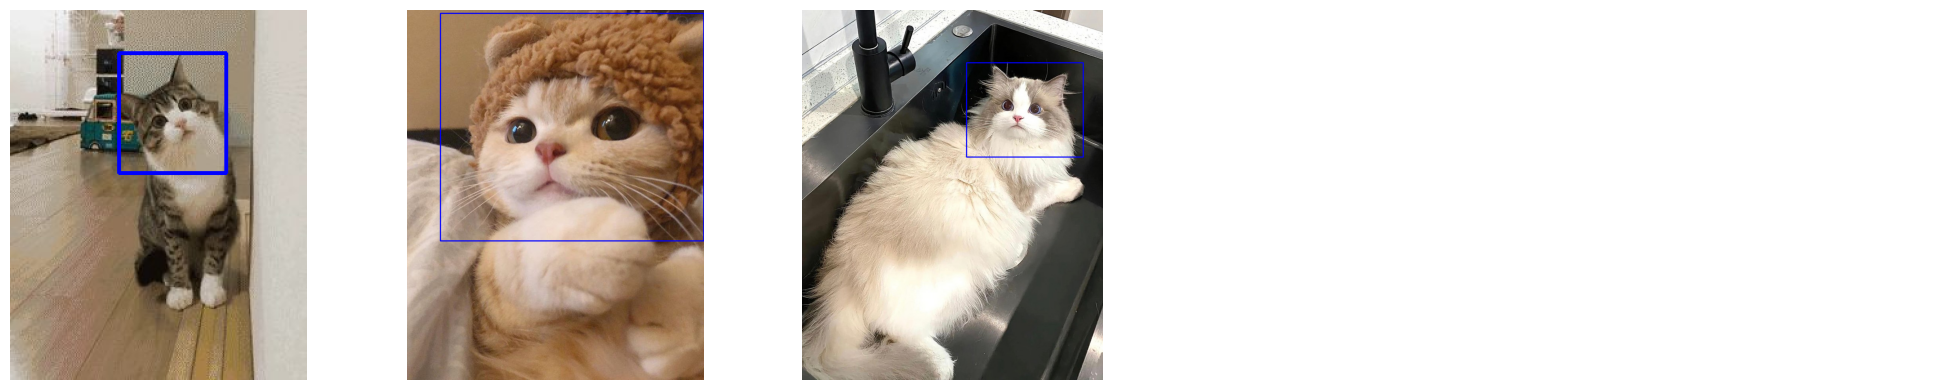

In [10]:
visualize_images_with_predictions(model=model,
                                  image_paths = ['/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_1.jpg',
                                                '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_2.jpg',
                                                '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_3.jpeg'])

## 라벨링 없는 데이터셋에 모델 적용

In [11]:
def cropped_img(input_base_dir, output_base_dir):
  # 감정 리스트: 직접입력
  emotions = ['Surprised', 'Scared', 'Sad', 'Normal', 'Happy', 'Disgusted', 'Angry']

  # 감정별 디렉토리 생성
  for emotion in emotions:
      os.makedirs(os.path.join(output_base_dir, emotion), exist_ok=True)

  # 각 감정 디렉토리의 이미지를 처리
  for emotion in emotions:
      input_dir = os.path.join(input_base_dir, emotion)
      output_dir = os.path.join(output_base_dir, emotion)

      # 디렉토리 내 모든 파일에 대해 바운딩 박스 예측 및 크롭
      for img_name in os.listdir(input_dir):
          img_path = os.path.join(input_dir, img_name)
          img = Image.open(img_path)
          results = model(img)

          # 결과에서 바운딩 박스 정보 추출
          for i, result in enumerate(results):
              for box in result.boxes:
                  # 바운딩 박스 좌표 추출 (정수형으로 변환)
                  xmin, ymin, xmax, ymax = map(int, box.xyxy[0].tolist())

                  # 바운딩 박스 크롭
                  cropped_img = img.crop((xmin, ymin, xmax, ymax))

                  # 크롭한 이미지 저장 (여러 바운딩 박스가 있을 경우, 숫자로 구분)
                  cropped_img_name = f"{os.path.splitext(img_name)[0]}_crop{i}.jpg"
                  cropped_img.save(os.path.join(output_dir, cropped_img_name))

          print(f"Processed {img_name} in {emotion}")

  print("All images processed and saved.")

In [12]:
# cat_roboflow train
input_train_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/train/'
output_train_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/train_cropped/'
cropped_img(input_train_dir, output_train_dir)


0: 640x640 1 Beg, 1 Frightened, 69.8ms
Speed: 2.4ms preprocess, 69.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Processed 16_surp_jpeg.rf.e32dae81c2c08f5abd39527fde05bc16.jpg in Surprised

0: 640x640 1 Wonder, 94.2ms
Speed: 2.3ms preprocess, 94.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Processed 25_surp_jpeg.rf.d51be4ef09fe00bd9985850e43cc9ab9.jpg in Surprised

0: 640x640 1 Anger, 49.2ms
Speed: 1.8ms preprocess, 49.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Processed 14_surp_jpeg.rf.374359cb0a8d62e4f7880bf95ab3b4f5.jpg in Surprised

0: 640x640 1 Wonder, 50.1ms
Speed: 1.9ms preprocess, 50.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 26_surp_jpeg.rf.94de6ec3ef73ecc2fed5903bddf7473d.jpg in Surprised

0: 640x640 1 Wonder, 51.0ms
Speed: 1.8ms preprocess, 51.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Processed 15_surp_jpeg.rf.8da6606d7215f87daf891452a875bb

In [13]:
# cat_roboflow valid
input_valid_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/valid/'
output_valid_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/valid_cropped/'
cropped_img(input_valid_dir, output_valid_dir)


0: 640x640 1 Scare, 1 Wonder, 51.3ms
Speed: 2.0ms preprocess, 51.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Processed 12_surp_jpeg.rf.5f16d1e1a3c5aa6071d728449a7cb8e5.jpg in Surprised

0: 640x640 (no detections), 52.3ms
Speed: 1.7ms preprocess, 52.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Processed 33_surp_jpeg.rf.88267371c1a61edbae847093059683c4.jpg in Surprised

0: 640x640 1 Beg, 1 Frightened, 1 Wonder, 55.9ms
Speed: 2.4ms preprocess, 55.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Processed 5_surp_jpeg.rf.5644c722024b69b92fefa8e7943342ea.jpg in Surprised

0: 640x640 1 Frightened, 1 Wonder, 63.9ms
Speed: 2.7ms preprocess, 63.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Processed 87_surp_jpeg.rf.ef43af1e62ad8ebc078862d5b3b7d81f.jpg in Surprised

0: 640x640 1 Anger, 1 Sick, 65.8ms
Speed: 2.3ms preprocess, 65.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Processed

## EfficientNet 연결

In [14]:
class EmotionDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_names = []

        # 디렉토리별 이미지 로드
        for class_name in os.listdir(self.root_dir):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_dir):
                self.class_names.append(class_name)
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    if img_path.endswith(('.png', '.jpg', '.jpeg')):
                        self.image_paths.append(img_path)
                        self.labels.append(class_name)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.class_names.index(self.labels[idx])

        if self.transform:
            image = self.transform(image)

        return image, label

In [15]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAutocontrast(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [16]:
# Dataset&Dataloader 만들기
train_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/train_cropped/'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/cat_roboflow/valid_cropped/'

# Train 데이터셋과 DataLoader 생성
train_dataset = EmotionDataset(root_dir=train_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Validation 데이터셋과 DataLoader 생성
valid_dataset = EmotionDataset(root_dir=valid_dir, transform=test_transform)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [17]:
from collections import Counter
# 클래스별 데이터 개수 세기
class_labels = valid_dataset.labels
class_counts = Counter(class_labels)

# 클래스별 데이터 개수 출력
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: Surprised, Count: 5
Class: Scared, Count: 19
Class: Sad, Count: 34
Class: Normal, Count: 24
Class: Happy, Count: 37
Class: Disgusted, Count: 16
Class: Angry, Count: 28


In [18]:
class_labels = train_dataset.labels
class_counts = Counter(class_labels)

# 클래스별 데이터 개수 출력
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: Surprised, Count: 90
Class: Scared, Count: 72
Class: Sad, Count: 62
Class: Normal, Count: 74
Class: Happy, Count: 57
Class: Disgusted, Count: 58
Class: Angry, Count: 70


In [19]:
train_dataset.__len__()

483

In [20]:
valid_dataset.__len__()

163

In [21]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=6617eca0755b07d12af5841780f62cd8ddd66643e91cff3fc4cf5f4255b956bd
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [22]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [23]:
from efficientnet_pytorch import EfficientNet
eff_model = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 35.4MB/s]

Loaded pretrained weights for efficientnet-b0


In [24]:
def train_and_evaluate(model, train_loader, valid_loader, num_epochs=50, device='cuda'):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)

    # ReduceLROnPlateau 스케줄러 사용
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss:.3f}, Training Accuracy: {train_accuracy:.3f}%")

        # Validation loop
        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                total_valid += labels.size(0)
                correct_valid += (predicted == labels).sum().item()

        avg_valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = 100 * correct_valid / total_valid
        valid_losses.append(avg_valid_loss)
        valid_accuracies.append(valid_accuracy)
        print(f"Epoch {epoch+1}, Validation Loss: {avg_valid_loss:.3f}, Validation Accuracy: {valid_accuracy:.3f}%")

        # ReduceLROnPlateau 스케줄러 업데이트
        lr_scheduler.step(avg_valid_loss)

    return train_losses, valid_losses, train_accuracies, valid_accuracies

In [25]:
train_losses, valid_losses, train_accuracies, valid_accuracies = train_and_evaluate(
    eff_model, train_loader, valid_loader, num_epochs=50, device='cuda'
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1, Training Loss: 3.703, Training Accuracy: 28.364%
Epoch 1, Validation Loss: 4.132, Validation Accuracy: 42.945%
Epoch 2, Training Loss: 1.315, Training Accuracy: 59.420%
Epoch 2, Validation Loss: 2.593, Validation Accuracy: 39.877%
Epoch 3, Training Loss: 0.788, Training Accuracy: 71.636%
Epoch 3, Validation Loss: 2.491, Validation Accuracy: 40.491%
Epoch 4, Training Loss: 0.553, Training Accuracy: 83.644%
Epoch 4, Validation Loss: 1.785, Validation Accuracy: 52.147%
Epoch 5, Training Loss: 0.527, Training Accuracy: 86.749%
Epoch 5, Validation Loss: 2.133, Validation Accuracy: 50.307%
Epoch 6, Training Loss: 0.381, Training Accuracy: 89.855%
Epoch 6, Validation Loss: 2.288, Validation Accuracy: 55.215%
Epoch 7, Training Loss: 0.323, Training Accuracy: 90.476%
Epoch 7, Validation Loss: 4.054, Validation Accuracy: 47.239%
Epoch 8, Training Loss: 0.424, Training Accuracy: 89.234%
Epoch 8, Validation Loss: 2.356, Validation Accuracy: 53.988%
Epoch 9, Training Loss: 0.380, Training 

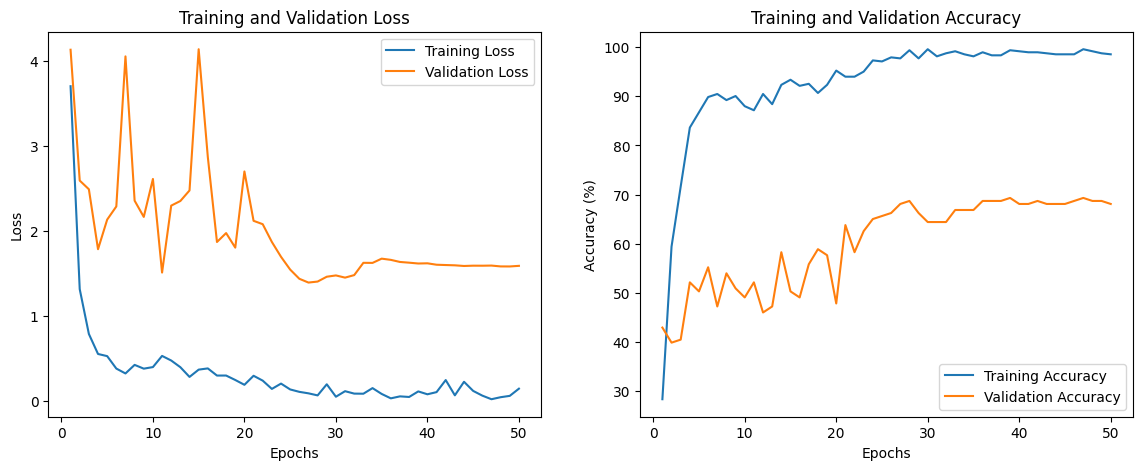

In [26]:
epochs = range(1, 51)

plt.figure(figsize=(14, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
eff_model.eval()

# 예측과 라벨을 저장할 빈 텐서를 초기화합니다.
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(valid_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = eff_model(inputs)
        _, preds = torch.max(outputs, 1)

        # 배치 예측 결과를 추가합니다.
        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

# 혼동 행렬 생성
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 1  0  1  1  1  0  1]
 [ 1 15  1  1  1  0  0]
 [ 0  3 27  2  1  0  1]
 [ 1  2  1 20  0  0  0]
 [ 0  1  0  4 23  6  3]
 [ 3  3  0  1  0  8  1]
 [ 0  2  2  3  0  4 17]]


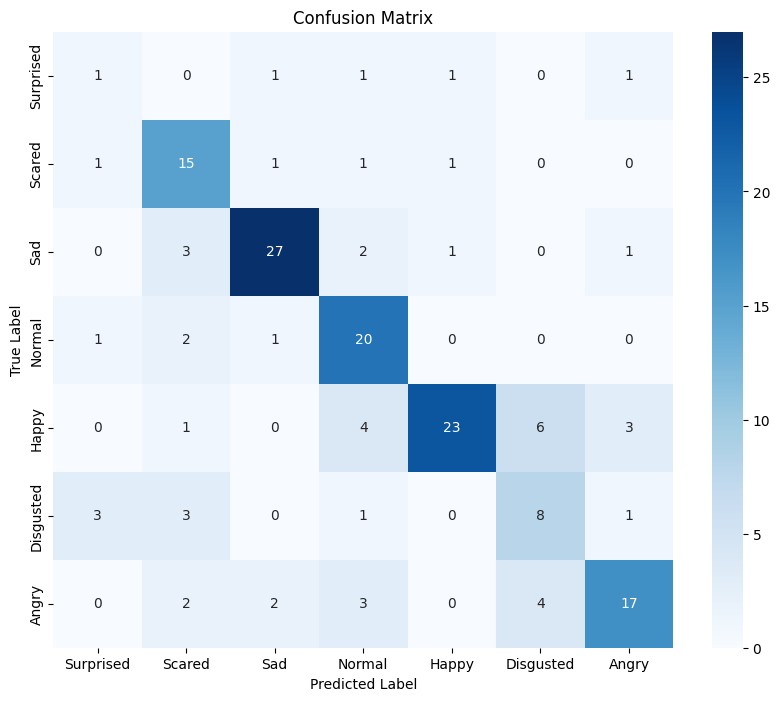

In [28]:
import seaborn as sns
class_names = ['Surprised', 'Scared', 'Sad', 'Normal', 'Happy', 'Disgusted', 'Angry']

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
def predict_emotion(image_path, yolo_model, eff_model, device='cpu'):
    # 모델 평가 모드로 전환
    yolo_model.eval()
    eff_model.eval()

    # 이미지 불러오기
    image = Image.open(image_path)
    result = yolo_model(image)  # YOLO v8 bbox 추출

    yolo_model.to(device)
    eff_model.to(device)

    cropped_images = []
    predicted_labels = []

    for i, result in enumerate(result):
        for box in result.boxes:
            # 바운딩 박스 좌표 추출 (정수형으로 변환)
            xmin, ymin, xmax, ymax = map(int, box.xyxy[0].tolist())
            # 바운딩 박스 크롭
            cropped_img = image.crop((xmin, ymin, xmax, ymax))
            cropped_images.append(cropped_img)

            # 이미지 전처리
            preprocess = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
            ])
            # 이미지를 전처리 후 배치 차원을 추가
            image_tensor = preprocess(cropped_img).unsqueeze(0).to(device)

            # EfficientNet 예측
            with torch.no_grad():
                outputs = eff_model(image_tensor)
                _, predicted_class = torch.max(outputs, 1)

            # 클래스 매핑
            emotions = ['Surprised', 'Scared', 'Sad', 'Normal', 'Happy', 'Disgusted', 'Angry']
            predicted_label = emotions[predicted_class.item()]
            predicted_labels.append(predicted_label)

    # 결과 출력
    for i, (cropped_img, label) in enumerate(zip(cropped_images, predicted_labels)):
        plt.figure()
        plt.imshow(cropped_img)
        plt.title(f"Predicted Emotion: {label}")
        plt.axis('off')
        plt.show()

    return cropped_images, predicted_labels


0: 640x544 1 Frightened, 50.3ms
Speed: 3.5ms preprocess, 50.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


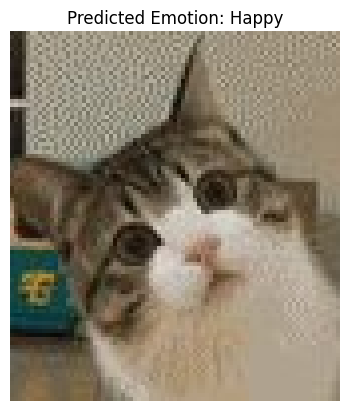

([<PIL.Image.Image image mode=RGB size=83x93>], ['Happy'])

In [40]:
predict_emotion(image_path='/content/drive/MyDrive/Colab Notebooks/비타민 14기/여름 CV/catface_bbox/cat_test_1.jpg',
                yolo_model=model, eff_model=eff_model)